In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns








In [5]:
# get stock data
exxon = yf.download('XOM','2020-01-01','2023-01-01')
nextera = yf.download("NEE", '2020-01-01','2023-01-01')
tesla = yf.download("TSLA", '2020-01-01','2023-01-01')
ICLN = yf.download('ICLN','2020-01-01','2023-01-01')
USO = yf.download("USO", '2020-01-01','2023-01-01')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Opening Price ($)')

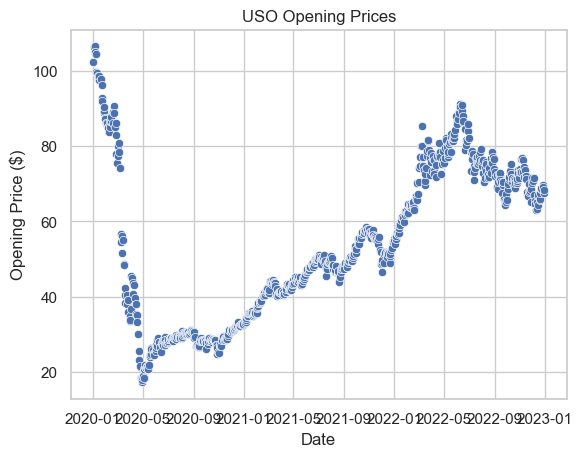

In [6]:
sns.set_theme(style="whitegrid")

sns.scatterplot(data=USO, x="Date", y="Open")
plt.title("USO Opening Prices")
plt.ylabel("Opening Price ($)")

Text(0, 0.5, 'Opening Price ($)')

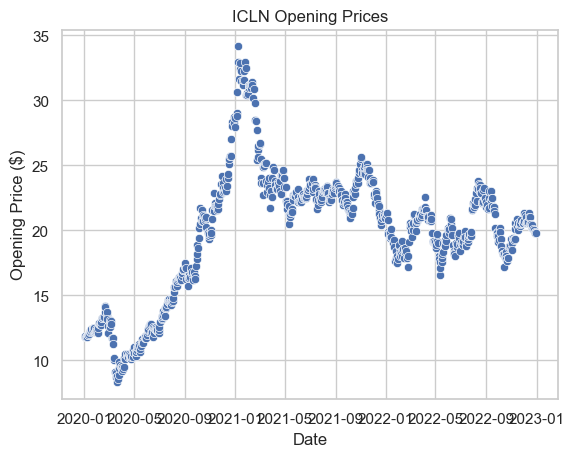

In [7]:
sns.set_theme(style="whitegrid")

sns.scatterplot(data=ICLN, x="Date", y="Open")
plt.title("ICLN Opening Prices")
plt.ylabel("Opening Price ($)")